# Mental Health & Social Media - Exploratory Analysis
## Author: Ahtasham Anjum
## Date: November 2024

This notebook performs comprehensive exploratory data analysis on the Mental Health and Social Media Balance dataset.

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.2)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [4]:
df = pd.read_csv('../data/Mental_Health_and_Social_Media_Balance_Dataset.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Display first few rows
df.head()

Dataset loaded successfully!
Shape: (500, 10)
Rows: 500, Columns: 10


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


## 3. Dataset Overview

In [5]:
print("="*80)
print("DATASET INFORMATION")
print("="*80)
print(f"\nColumns: {df.columns.tolist()}\n")
print(df.info())
print("\n" + "="*80)
print("MISSING VALUES")
print("="*80)
print(df.isnull().sum())
print("\n No missing values detected!")

DATASET INFORMATION

Columns: ['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)', 'Social_Media_Platform', 'Happiness_Index(1-10)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-n

## 4. Basic Statistics

In [6]:
print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
df.describe()

DESCRIPTIVE STATISTICS


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


## 5. Target Variable Analysis

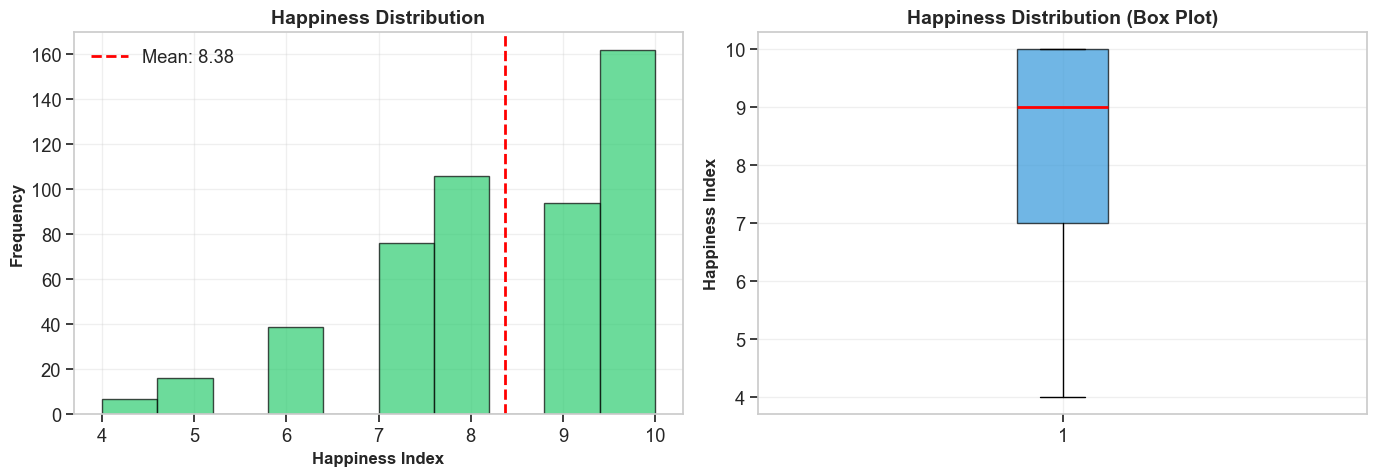

Average Happiness: 8.38
Median Happiness: 9.00
Std Deviation: 1.52


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Happiness_Index(1-10)'], bins=10, color='#2ecc71', 
             edgecolor='black', alpha=0.7)
axes[0].axvline(df['Happiness_Index(1-10)'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f"Mean: {df['Happiness_Index(1-10)'].mean():.2f}")
axes[0].set_xlabel('Happiness Index', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Happiness Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['Happiness_Index(1-10)'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#3498db', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Happiness Index', fontsize=12, fontweight='bold')
axes[1].set_title('Happiness Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average Happiness: {df['Happiness_Index(1-10)'].mean():.2f}")
print(f"Median Happiness: {df['Happiness_Index(1-10)'].median():.2f}")
print(f"Std Deviation: {df['Happiness_Index(1-10)'].std():.2f}")

## 6. Categorical Variables Analysis

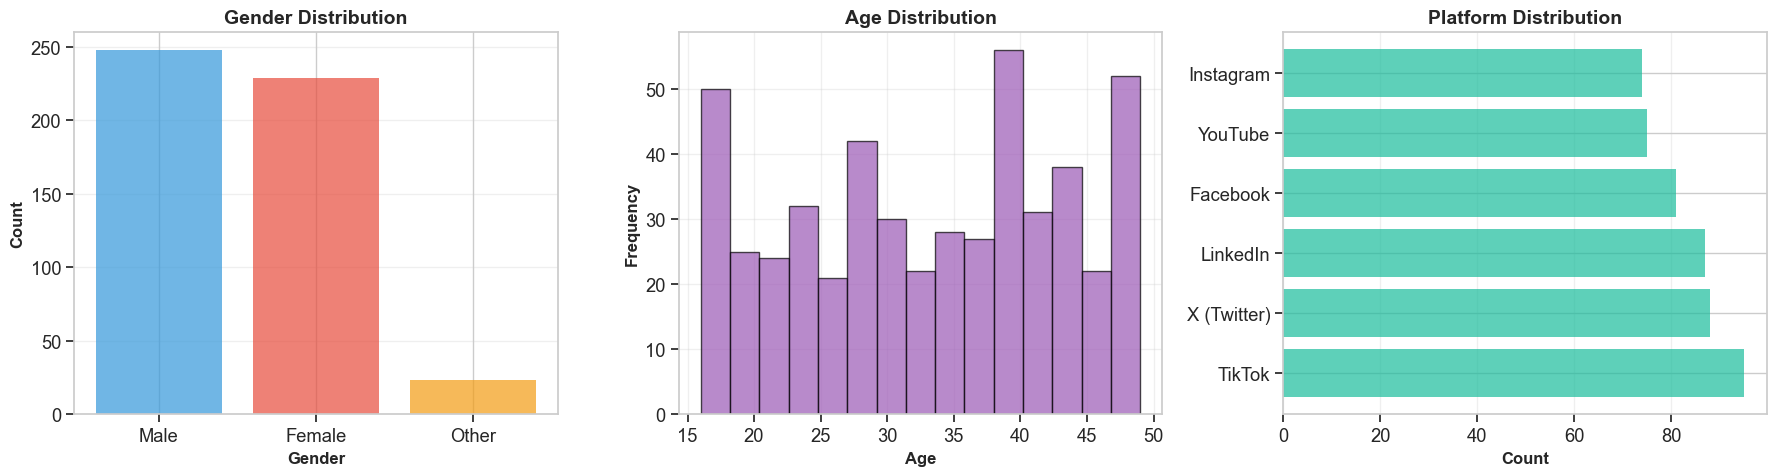

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, color=['#3498db', '#e74c3c', '#f39c12'], alpha=0.7)
axes[0].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Age Distribution
axes[1].hist(df['Age'], bins=15, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# Platform Distribution
platform_counts = df['Social_Media_Platform'].value_counts()
axes[2].barh(platform_counts.index, platform_counts.values, color='#1abc9c', alpha=0.7)
axes[2].set_xlabel('Count', fontsize=12, fontweight='bold')
axes[2].set_title('Platform Distribution', fontsize=14, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

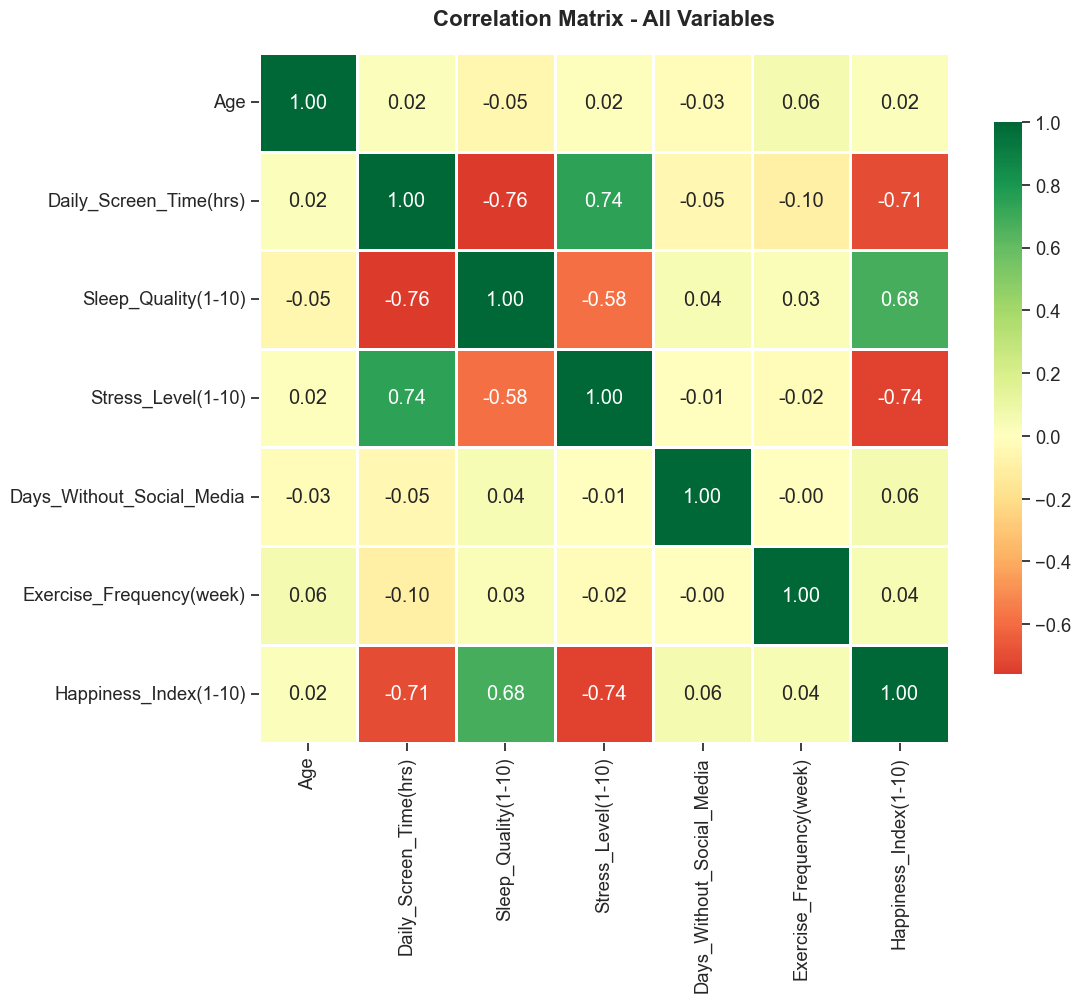


CORRELATIONS WITH HAPPINESS INDEX
Happiness_Index(1-10)        1.000000
Sleep_Quality(1-10)          0.678829
Days_Without_Social_Media    0.063525
Exercise_Frequency(week)     0.041224
Age                          0.018513
Daily_Screen_Time(hrs)      -0.705206
Stress_Level(1-10)          -0.737213
Name: Happiness_Index(1-10), dtype: float64


In [9]:
# Select numerical columns
numerical_cols = ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 
                  'Stress_Level(1-10)', 'Days_Without_Social_Media',
                  'Exercise_Frequency(week)', 'Happiness_Index(1-10)']

correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlations with Happiness
happiness_corr = correlation_matrix['Happiness_Index(1-10)'].sort_values(ascending=False)
print("\n" + "="*80)
print("CORRELATIONS WITH HAPPINESS INDEX")
print("="*80)
print(happiness_corr)

## 8. Screen Time Analysis

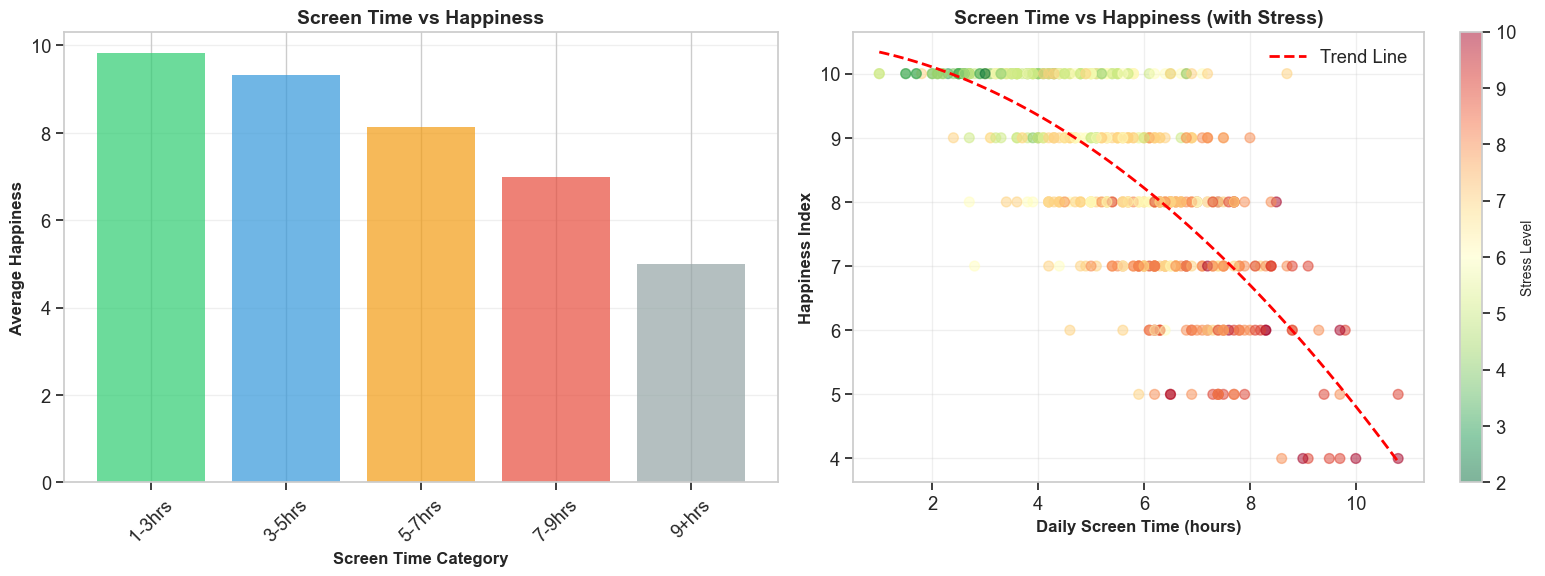

In [10]:
# Create screen time categories
df['Screen_Time_Category'] = pd.cut(df['Daily_Screen_Time(hrs)'], 
                                     bins=[0, 3, 5, 7, 9, 12],
                                     labels=['1-3hrs', '3-5hrs', '5-7hrs', '7-9hrs', '9+hrs'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Screen time vs Happiness
screen_happiness = df.groupby('Screen_Time_Category')['Happiness_Index(1-10)'].mean()
axes[0].bar(range(len(screen_happiness)), screen_happiness.values, 
            color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6'], alpha=0.7)
axes[0].set_xticks(range(len(screen_happiness)))
axes[0].set_xticklabels(screen_happiness.index, rotation=45)
axes[0].set_xlabel('Screen Time Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Happiness', fontsize=12, fontweight='bold')
axes[0].set_title('Screen Time vs Happiness', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Scatter plot with trend line
axes[1].scatter(df['Daily_Screen_Time(hrs)'], df['Happiness_Index(1-10)'], 
               alpha=0.5, c=df['Stress_Level(1-10)'], cmap='RdYlGn_r', s=50)
z = np.polyfit(df['Daily_Screen_Time(hrs)'], df['Happiness_Index(1-10)'], 2)
p = np.poly1d(z)
x_line = np.linspace(df['Daily_Screen_Time(hrs)'].min(), df['Daily_Screen_Time(hrs)'].max(), 100)
axes[1].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend Line')
axes[1].set_xlabel('Daily Screen Time (hours)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Happiness Index', fontsize=12, fontweight='bold')
axes[1].set_title('Screen Time vs Happiness (with Stress)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('Stress Level', fontsize=10)

plt.tight_layout()
plt.show()

## 9. Platform Comparison


PLATFORM COMPARISON
                       Happiness_Index(1-10)  Daily_Screen_Time(hrs)  \
Social_Media_Platform                                                  
Facebook                                8.35                    5.66   
Instagram                               7.99                    6.08   
LinkedIn                                8.52                    5.29   
TikTok                                  8.38                    5.46   
X (Twitter)                             8.65                    5.31   
YouTube                                 8.31                    5.48   

                       Stress_Level(1-10)  Sleep_Quality(1-10)  
Social_Media_Platform                                           
Facebook                             6.67                 6.10  
Instagram                            6.96                 5.91  
LinkedIn                             6.46                 6.55  
TikTok                               6.59                 6.46  
X (Twitter) 

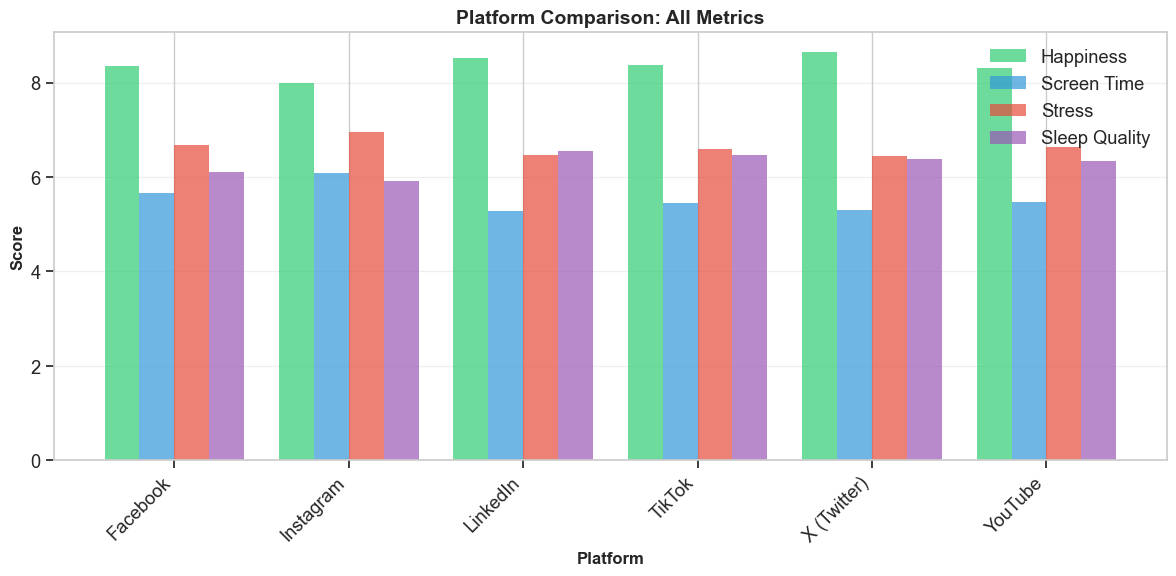

In [11]:
platform_stats = df.groupby('Social_Media_Platform').agg({
    'Happiness_Index(1-10)': 'mean',
    'Daily_Screen_Time(hrs)': 'mean',
    'Stress_Level(1-10)': 'mean',
    'Sleep_Quality(1-10)': 'mean'
}).round(2)

print("\n" + "="*80)
print("PLATFORM COMPARISON")
print("="*80)
print(platform_stats)

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(platform_stats))
width = 0.2

bars1 = ax.bar(x - 1.5*width, platform_stats['Happiness_Index(1-10)'], width, 
               label='Happiness', color='#2ecc71', alpha=0.7)
bars2 = ax.bar(x - 0.5*width, platform_stats['Daily_Screen_Time(hrs)'], width, 
               label='Screen Time', color='#3498db', alpha=0.7)
bars3 = ax.bar(x + 0.5*width, platform_stats['Stress_Level(1-10)'], width, 
               label='Stress', color='#e74c3c', alpha=0.7)
bars4 = ax.bar(x + 1.5*width, platform_stats['Sleep_Quality(1-10)'], width, 
               label='Sleep Quality', color='#9b59b6', alpha=0.7)

ax.set_xlabel('Platform', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Platform Comparison: All Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(platform_stats.index, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Age Group Analysis


AGE GROUP ANALYSIS
           Happiness_Index(1-10)  Daily_Screen_Time(hrs)  Stress_Level(1-10)  \
Age_Group                                                                      
16-20                       8.44                    5.48                6.45   
21-30                       8.25                    5.49                6.68   
31-40                       8.38                    5.64                6.70   
41-50                       8.46                    5.48                6.57   

           Exercise_Frequency(week)  
Age_Group                            
16-20                          2.21  
21-30                          2.48  
31-40                          2.43  
41-50                          2.56  


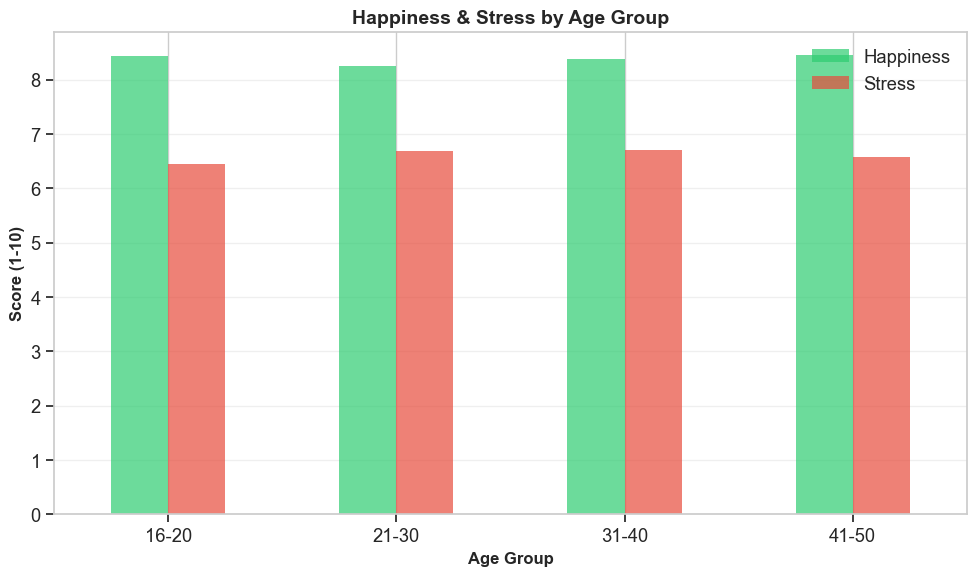

In [12]:
df['Age_Group'] = pd.cut(df['Age'], bins=[15, 20, 30, 40, 50],
                         labels=['16-20', '21-30', '31-40', '41-50'])

age_stats = df.groupby('Age_Group').agg({
    'Happiness_Index(1-10)': 'mean',
    'Daily_Screen_Time(hrs)': 'mean',
    'Stress_Level(1-10)': 'mean',
    'Exercise_Frequency(week)': 'mean'
}).round(2)

print("\n" + "="*80)
print("AGE GROUP ANALYSIS")
print("="*80)
print(age_stats)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
age_stats[['Happiness_Index(1-10)', 'Stress_Level(1-10)']].plot(kind='bar', ax=ax, 
                                                                  color=['#2ecc71', '#e74c3c'], 
                                                                  alpha=0.7)
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Score (1-10)', fontsize=12, fontweight='bold')
ax.set_title('Happiness & Stress by Age Group', fontsize=14, fontweight='bold')
ax.set_xticklabels(age_stats.index, rotation=0)
ax.legend(['Happiness', 'Stress'])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Key Findings Summary

In [15]:
print("\n" + "="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)

print("\n1️ DATASET OVERVIEW:")
print(f"   • Total Users: {len(df)}")
print(f"   • Age Range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"   • Average Happiness: {df['Happiness_Index(1-10)'].mean():.2f}/10")
print(f"   • Average Screen Time: {df['Daily_Screen_Time(hrs)'].mean():.2f} hours/day")

print("\n2️ CORRELATIONS WITH HAPPINESS:")
happiness_corr_sorted = happiness_corr.drop('Happiness_Index(1-10)')
for var, corr in happiness_corr_sorted.items():
    print(f"   • {var}: {corr:+.3f}")

print("\n3️ SCREEN TIME INSIGHTS:")
print(f"   • Optimal range: 1-3 hours (Happiness: {screen_happiness.iloc[0]:.2f}/10)")
print(f"   • High usage (9+ hrs): Happiness drops to {screen_happiness.iloc[-1]:.2f}/10")

print("\n4️ PLATFORM RANKINGS:")
platform_rank = platform_stats.sort_values('Happiness_Index(1-10)', ascending=False)
for i, (platform, row) in enumerate(platform_rank.iterrows(), 1):
    print(f"   {i}. {platform}: {row['Happiness_Index(1-10)']:.2f}/10 (Stress: {row['Stress_Level(1-10)']:.2f})")

print("\n5️ AGE GROUP PATTERNS:")
for age_grp, row in age_stats.iterrows():
    print(f"   • {age_grp}: Happiness {row['Happiness_Index(1-10)']:.2f}, Screen Time {row['Daily_Screen_Time(hrs)']:.2f}hrs")

print("\n" + "="*80)
print("EXPLORATORY ANALYSIS COMPLETE!")
print("="*80)


KEY FINDINGS SUMMARY

1️ DATASET OVERVIEW:
   • Total Users: 500
   • Age Range: 16 - 49 years
   • Average Happiness: 8.38/10
   • Average Screen Time: 5.53 hours/day

2️ CORRELATIONS WITH HAPPINESS:
   • Sleep_Quality(1-10): +0.679
   • Days_Without_Social_Media: +0.064
   • Exercise_Frequency(week): +0.041
   • Age: +0.019
   • Daily_Screen_Time(hrs): -0.705
   • Stress_Level(1-10): -0.737

3️ SCREEN TIME INSIGHTS:
   • Optimal range: 1-3 hours (Happiness: 9.82/10)
   • High usage (9+ hrs): Happiness drops to 5.00/10

4️ PLATFORM RANKINGS:
   1. X (Twitter): 8.65/10 (Stress: 6.45)
   2. LinkedIn: 8.52/10 (Stress: 6.46)
   3. TikTok: 8.38/10 (Stress: 6.59)
   4. Facebook: 8.35/10 (Stress: 6.67)
   5. YouTube: 8.31/10 (Stress: 6.64)
   6. Instagram: 7.99/10 (Stress: 6.96)

5️ AGE GROUP PATTERNS:
   • 16-20: Happiness 8.44, Screen Time 5.48hrs
   • 21-30: Happiness 8.25, Screen Time 5.49hrs
   • 31-40: Happiness 8.38, Screen Time 5.64hrs
   • 41-50: Happiness 8.46, Screen Time 5.48hrs

## Next Steps

📋 **Next Steps:**
1. Statistical hypothesis testing (ANOVA, T-tests)
2. Machine learning model development
3. Feature importance analysis
4. User segmentation
5. Interactive dashboard creation